In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
categorical_df = pd.read_csv(r'categorical_df.csv')
cols = []
for i in range(len(categorical_df.columns)):
    cols.append(categorical_df.columns[i].lower().replace(' ', '_'))
categorical_df.columns = cols

categorical_df = categorical_df.drop ('unnamed:_0', axis = 1)
categorical_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_type,policy_number
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Corporate,L3
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Offer3,Agent,Four-Door Car,Medsize,Personal,L3
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Personal,L3
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Offer1,Call Center,SUV,Medsize,Corporate,L2
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Offer1,Agent,Four-Door Car,Medsize,Personal,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Offer2,Web,Four-Door Car,Medsize,Personal,L1
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Offer1,Branch,Four-Door Car,Medsize,Corporate,L3
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Offer1,Branch,Four-Door Car,Medsize,Corporate,L2
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Offer3,Branch,Four-Door Car,Large,Personal,L2


In [6]:
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number'],
      dtype='object')

In [7]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])
categorical_df.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employment_status            object
gender                       object
location_code                object
marital_status               object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
policy_type                  object
policy_number                object
dtype: object

In [8]:
types_of_unique_values = ['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number']
for column in types_of_unique_values:
    unique_values = categorical_df[column].unique()
    print(f'Unique values for {column}:')
    print(unique_values)
    print()

Unique values for customer:
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

Unique values for state:
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Unique values for response:
['No' 'Yes']

Unique values for coverage:
['Basic' 'Extended' 'Premium']

Unique values for education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Unique values for effective_to_date:
<DatetimeArray>
['2011-02-24 00:00:00', '2011-01-31 00:00:00', '2011-02-19 00:00:00',
 '2011-01-20 00:00:00', '2011-02-03 00:00:00', '2011-01-25 00:00:00',
 '2011-01-18 00:00:00', '2011-01-26 00:00:00', '2011-02-17 00:00:00',
 '2011-02-21 00:00:00', '2011-01-06 00:00:00', '2011-02-06 00:00:00',
 '2011-01-10 00:00:00', '2011-01-17 00:00:00', '2011-01-05 00:00:00',
 '2011-02-27 00:00:00', '2011-01-14 00:00:00', '2011-01-21 00:00:00',
 '2011-02-05 00:00:00', '2011-01-29 00:00:00', '2011-02-28 00:00:00',
 '2011-02-12 00:00:00', '2011-02-02 00:00:00', '2011-02-07 00:00:00',
 '2011-01-22 0

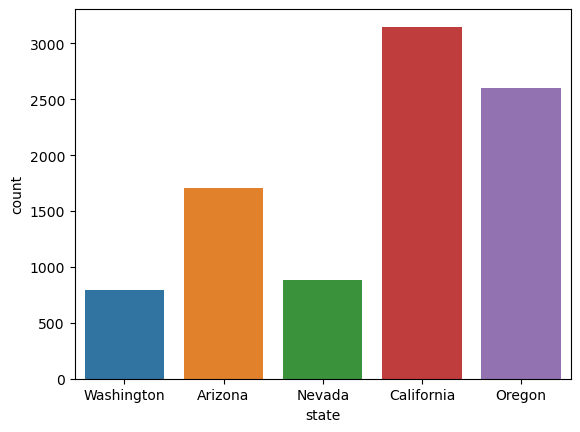

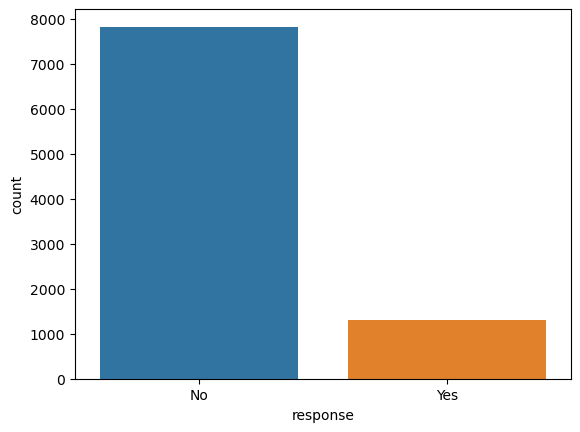

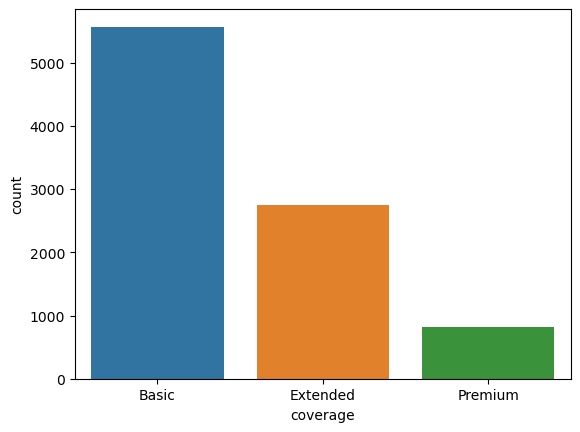

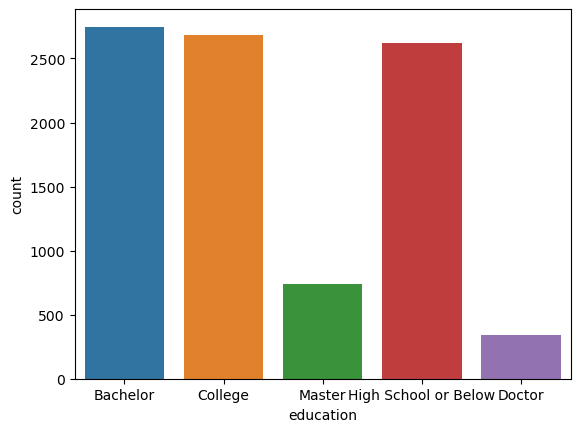

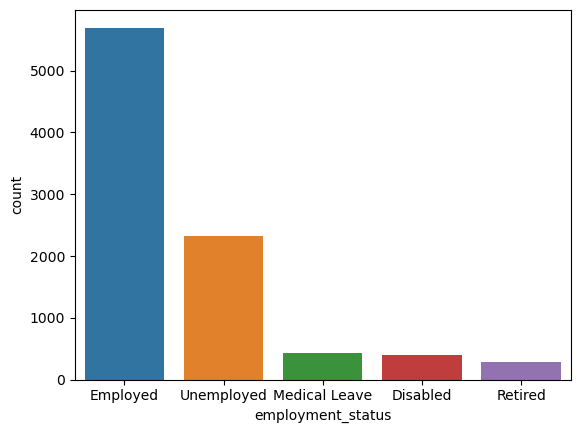

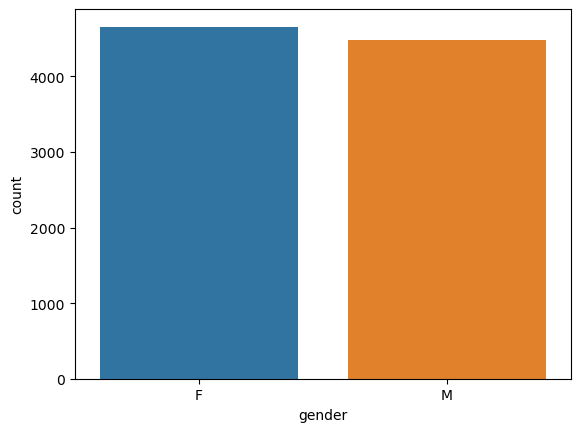

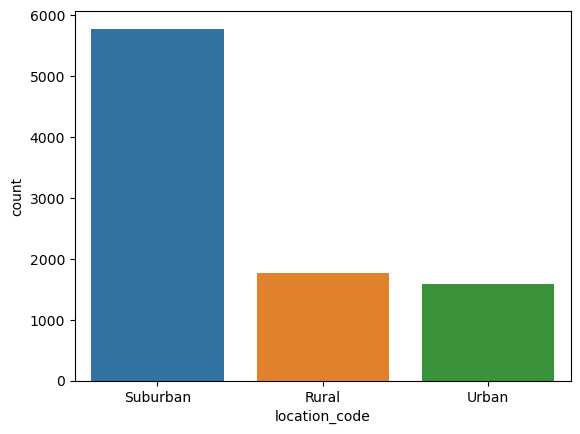

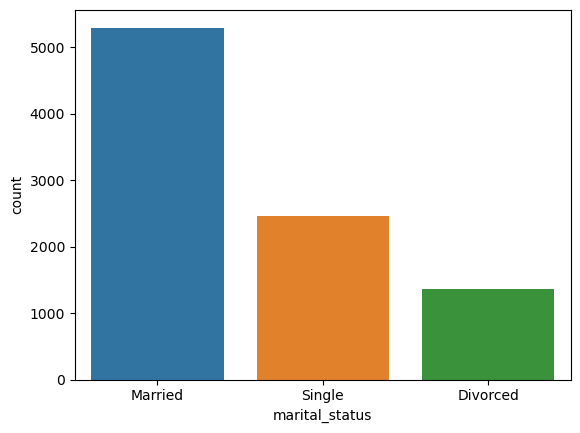

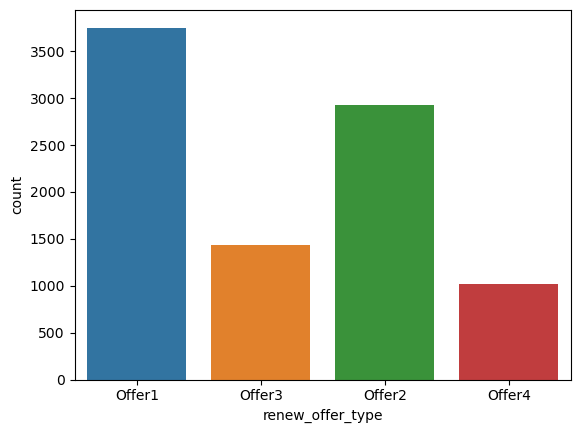

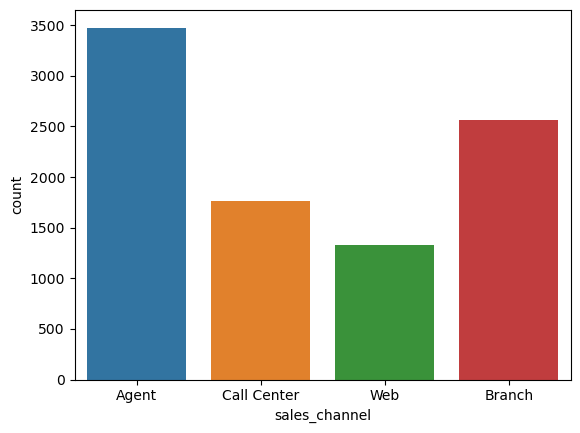

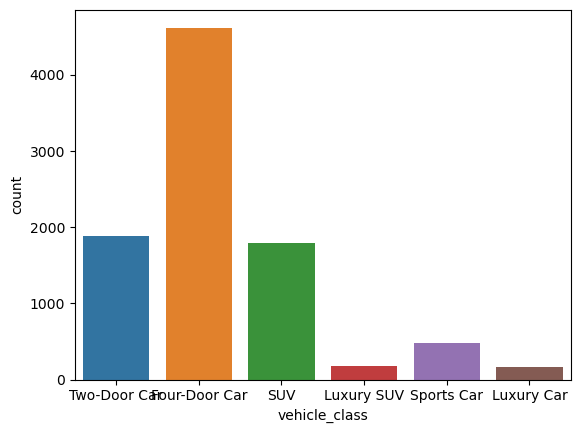

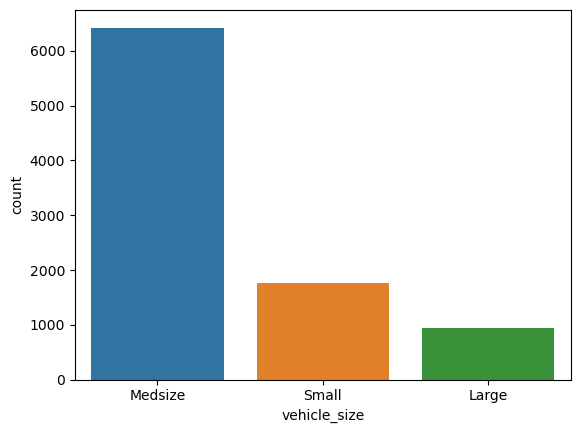

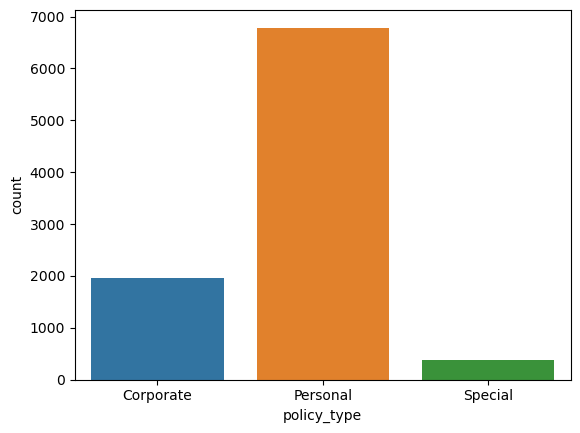

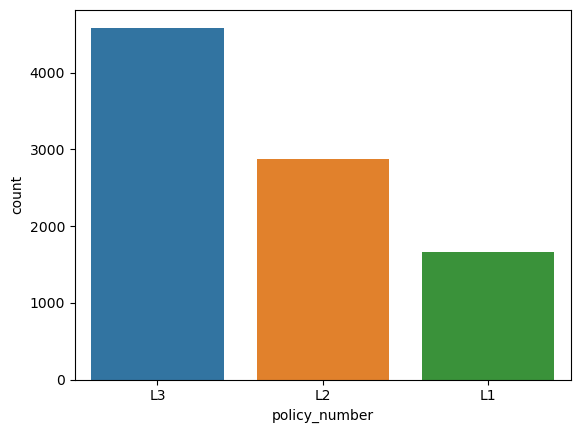

In [9]:
cat_to_plot = categorical_df.drop(['customer', 'effective_to_date'], axis=1)

def plot_cat(cat_to_plot):
    for column in cat_to_plot.columns:
        sns.countplot(x=cat_to_plot[column])
        plt.show()
    return None
   
plot_cat(cat_to_plot)

In [10]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])
categorical_df['day'] = categorical_df['effective_to_date'].dt.day
categorical_df['month'] = categorical_df['effective_to_date'].dt.month
categorical_df['year'] = categorical_df['effective_to_date'].dt.year
categorical_df[['effective_to_date', 'day', 'month', 'year']]

,effective_to_date,day,month,year
0,2011-02-24,24,2,2011
1,2011-01-31,31,1,2011
2,2011-02-19,19,2,2011
3,2011-01-20,20,1,2011
4,2011-02-03,3,2,2011
...,...,...,...,...
9129,2011-02-10,10,2,2011
9130,2011-02-12,12,2,2011
9131,2011-02-06,6,2,2011
9132,2011-02-03,3,2,2011


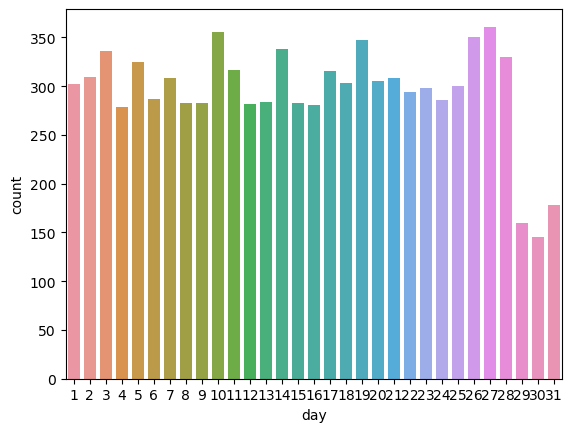

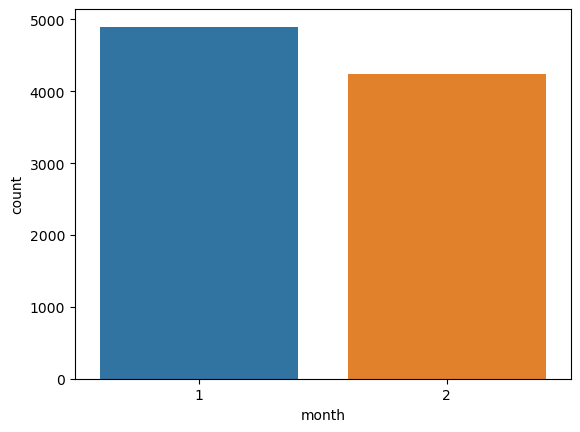

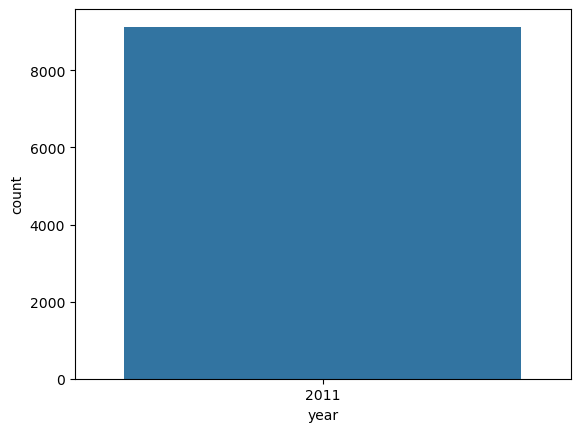

In [11]:
cat_to_plot = categorical_df[['day', 'month', 'year']]

def plot_cat(cat_to_plot):
    for column in cat_to_plot.columns:
        sns.countplot(x = cat_to_plot[column])
        plt.show()
    return None
   
plot_cat(cat_to_plot)

In [12]:
['state', 'coverage', 'employment_status','location_code','marital_status','vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number', 'month', 'year']

['state',
 'coverage',
 'employment_status',
 'location_code',
 'marital_status',
 'vehicle_class',
 'vehicle_size',
 'policy_type',
 'policy_number',
 'month',
 'year']